In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

In [13]:
df = acquire.get_store_data()

In [14]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store_id       913000 non-null  int64  
 5   item_brand     913000 non-null  object 
 6   item_name      913000 non-null  object 
 7   item_price     913000 non-null  float64
 8   item_upc12     913000 non-null  object 
 9   item_upc14     913000 non-null  object 
 10  store_address  913000 non-null  object 
 11  store_city     913000 non-null  object 
 12  store_state    913000 non-null  object 
 13  store_zipcode  913000 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 104.5+ MB


In [5]:
df.to_csv('store_data_csv')

In [7]:
df = df.set_index('sale_date').sort_index()

In [13]:
df = df.reset_index()

In [14]:
df.sale_date

0         Fri, 01 Apr 2016 00:00:00 GMT
1         Fri, 01 Apr 2016 00:00:00 GMT
2         Fri, 01 Apr 2016 00:00:00 GMT
3         Fri, 01 Apr 2016 00:00:00 GMT
4         Fri, 01 Apr 2016 00:00:00 GMT
                      ...              
912995    Wed, 31 May 2017 00:00:00 GMT
912996    Wed, 31 May 2017 00:00:00 GMT
912997    Wed, 31 May 2017 00:00:00 GMT
912998    Wed, 31 May 2017 00:00:00 GMT
912999    Wed, 31 May 2017 00:00:00 GMT
Name: sale_date, Length: 913000, dtype: object

In [17]:
df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')

In [20]:
df.sale_date

0         Fri, 01 Apr 2016
1         Fri, 01 Apr 2016
2         Fri, 01 Apr 2016
3         Fri, 01 Apr 2016
4         Fri, 01 Apr 2016
                ...       
912995    Wed, 31 May 2017
912996    Wed, 31 May 2017
912997    Wed, 31 May 2017
912998    Wed, 31 May 2017
912999    Wed, 31 May 2017
Name: sale_date, Length: 913000, dtype: object

In [21]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
df.sale_date

0        2016-04-01
1        2016-04-01
2        2016-04-01
3        2016-04-01
4        2016-04-01
            ...    
912995   2017-05-31
912996   2017-05-31
912997   2017-05-31
912998   2017-05-31
912999   2017-05-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

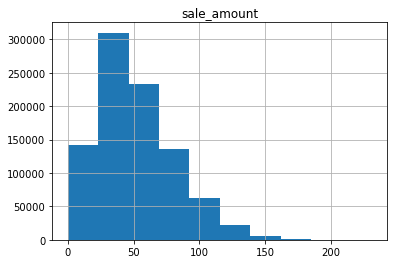

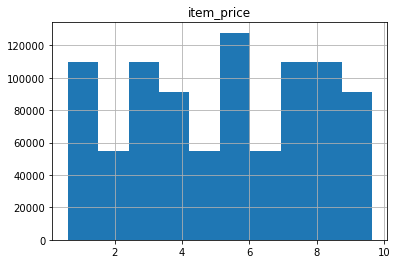

In [24]:
df['sale_amount'].hist().plot()
plt.title('sale_amount')
plt.show()
df['item_price'].hist().plot()
plt.title('item_price')
plt.show()

In [28]:
# df = df.set_index('sale_date')
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2016-04-01,38,88.0,691415,9,Sundown Naturals,Sundown Naturals Essential Electrolytes Tropic...,3.45,30768540548,30768540548,735 SW Military Dr,San Antonio,TX,78221
2016-04-01,50,60.0,905057,6,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,1015 S WW White Rd,San Antonio,TX,78220
2016-04-01,35,83.0,625679,3,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,2118 Fredericksburg Rdj,San Antonio,TX,78201
2016-04-01,15,132.0,269609,8,Suave,Suave Naturals Moisturizing Body Wash Creamy T...,9.11,79400847201,79400847201,15000 San Pedro Ave,San Antonio,TX,78232
2016-04-01,7,66.0,110747,1,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [29]:
df = df.sort_index()

In [30]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01,33,47.0,600755,10,The First Years,Tomy The First Years Gumdrop Orthodontic Pacif...,6.52,71463060078,71463060078,8503 NW Military Hwy,San Antonio,TX,78231
2013-01-01,44,17.0,790659,4,Elmers,Elmers Board Mate Dual Tip Glue Pen,7.06,26000001403,26000001403,516 S Flores St,San Antonio,TX,78204
2013-01-01,10,30.0,169819,4,Ahold,Ahold Cocoa Almonds,3.17,688267141676,688267141676,516 S Flores St,San Antonio,TX,78204
2013-01-01,32,18.0,577017,7,Barefoot,Barefoot Pinot Grigio 187,0.68,8500004528,8500004528,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01,12,38.0,204513,3,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,2118 Fredericksburg Rdj,San Antonio,TX,78201


In [32]:
df['month'] = df.index.month_name()
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month
sale_date,,,,,,,,,,,,,,
2013-01-01,33,47.0,600755,10,The First Years,Tomy The First Years Gumdrop Orthodontic Pacif...,6.52,71463060078,71463060078,8503 NW Military Hwy,San Antonio,TX,78231,January
2013-01-01,44,17.0,790659,4,Elmers,Elmers Board Mate Dual Tip Glue Pen,7.06,26000001403,26000001403,516 S Flores St,San Antonio,TX,78204,January
2013-01-01,10,30.0,169819,4,Ahold,Ahold Cocoa Almonds,3.17,688267141676,688267141676,516 S Flores St,San Antonio,TX,78204,January
2013-01-01,32,18.0,577017,7,Barefoot,Barefoot Pinot Grigio 187,0.68,8500004528,8500004528,12018 Perrin Beitel Rd,San Antonio,TX,78217,January
2013-01-01,12,38.0,204513,3,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,2118 Fredericksburg Rdj,San Antonio,TX,78201,January


In [33]:
df['day_of_week'] = df.index.day_name()
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,33,47.0,600755,10,The First Years,Tomy The First Years Gumdrop Orthodontic Pacif...,6.52,71463060078,71463060078,8503 NW Military Hwy,San Antonio,TX,78231,January,Tuesday
2013-01-01,44,17.0,790659,4,Elmers,Elmers Board Mate Dual Tip Glue Pen,7.06,26000001403,26000001403,516 S Flores St,San Antonio,TX,78204,January,Tuesday
2013-01-01,10,30.0,169819,4,Ahold,Ahold Cocoa Almonds,3.17,688267141676,688267141676,516 S Flores St,San Antonio,TX,78204,January,Tuesday
2013-01-01,32,18.0,577017,7,Barefoot,Barefoot Pinot Grigio 187,0.68,8500004528,8500004528,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday
2013-01-01,12,38.0,204513,3,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,2118 Fredericksburg Rdj,San Antonio,TX,78201,January,Tuesday


In [34]:
df['sales_total'] = df.sale_amount * df.item_price

In [35]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,33,47.0,600755,10,The First Years,Tomy The First Years Gumdrop Orthodontic Pacif...,6.52,71463060078,71463060078,8503 NW Military Hwy,San Antonio,TX,78231,January,Tuesday,306.44
2013-01-01,44,17.0,790659,4,Elmers,Elmers Board Mate Dual Tip Glue Pen,7.06,26000001403,26000001403,516 S Flores St,San Antonio,TX,78204,January,Tuesday,120.02
2013-01-01,10,30.0,169819,4,Ahold,Ahold Cocoa Almonds,3.17,688267141676,688267141676,516 S Flores St,San Antonio,TX,78204,January,Tuesday,95.10
2013-01-01,32,18.0,577017,7,Barefoot,Barefoot Pinot Grigio 187,0.68,8500004528,8500004528,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,12.24
2013-01-01,12,38.0,204513,3,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,2118 Fredericksburg Rdj,San Antonio,TX,78201,January,Tuesday,319.20


In [2]:
ops = pd.read_csv('opsd_germany_daily.csv')
ops.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [3]:
ops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [4]:
ops.columns = ops.columns.str.lower()

In [5]:
ops.date

0       2006-01-01
1       2006-01-02
2       2006-01-03
3       2006-01-04
4       2006-01-05
           ...    
4378    2017-12-27
4379    2017-12-28
4380    2017-12-29
4381    2017-12-30
4382    2017-12-31
Name: date, Length: 4383, dtype: object

In [6]:
ops = prepare.covert_date(ops, 'date', '%Y-%m-%d')
ops.head()

,date,consumption,wind,solar,wind+solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [7]:
ops.date

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4378   2017-12-27
4379   2017-12-28
4380   2017-12-29
4381   2017-12-30
4382   2017-12-31
Name: date, Length: 4383, dtype: datetime64[ns]

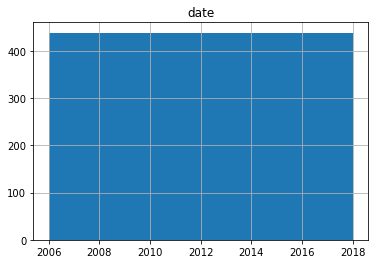

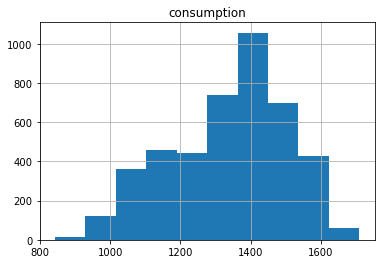

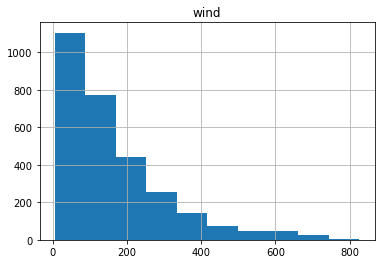

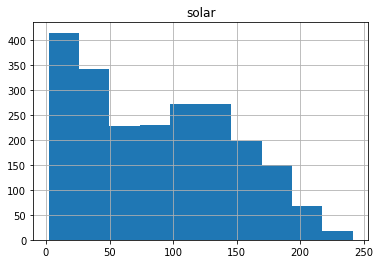

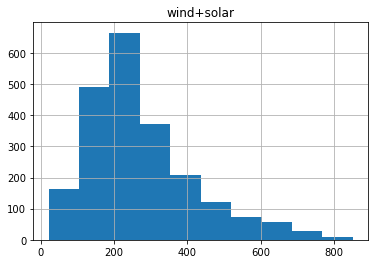

In [8]:
prepare.plot_hist(ops)

In [9]:
ops = prepare.date_index(ops, 'date')
ops.head()

,consumption,wind,solar,wind+solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [10]:
ops = prepare.month_year_add(ops)
ops.head()

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


In [12]:
ops.isnull().any()

consumption    False
wind            True
solar           True
wind+solar      True
month          False
year           False
dtype: bool

In [16]:
ops = ops.fillna(0)